# Matrix Plots
* The **heatmap** function plots rectangular data as a color-encoded matrix and provides indications of clusters within the data.
* The **clustermap** function plots a matrix dataset as a hierarchically-clustered heatmap (Scipy required).
* Seaborn API documentation: https://seaborn.pydata.org/api.html
* Seaborn colour palette keywords and list: https://seaborn.pydata.org/tutorial/color_palettes.html
___

In [3]:
# Library Import + Load two datasets
import seaborn as sns
%matplotlib inline

f = sns.load_dataset('flights')
f.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [4]:
t = sns.load_dataset('tips')
t.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


___
## Heatmap
* Data should prior processed into matrix form.
* The sns.heatmap function provides colours onto the data.
* Two methods to present data in matrix form:
    * Correlation (see ppt & pandas exercise one)
    * Pivot Table (see pandas06)

In [5]:
# Method One for Matrix: Correlation data (The numeric columns must be specified)
# Example based on the dataset, t
t[['total_bill', 'tip', 'size']].corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<Axes: >

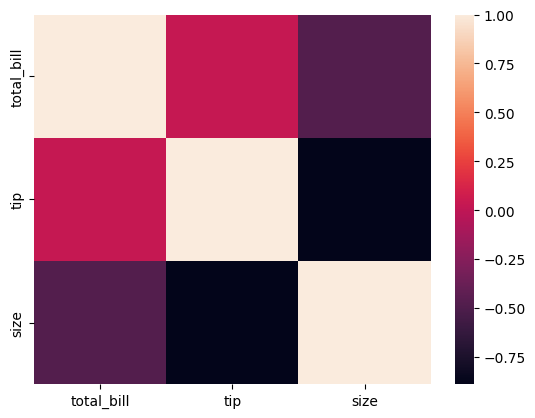

In [19]:
c = t[['total_bill', 'tip', 'size']].corr()
sns.heatmap(c.corr())

<Axes: >

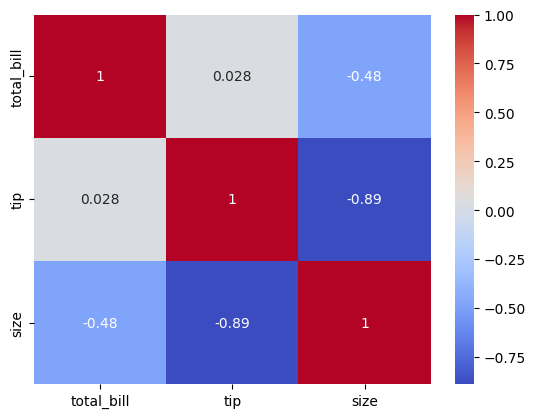

In [20]:
# Annotation shows the input values
sns.heatmap(c.corr(), cmap='coolwarm', annot=True)

In [21]:
# Method Two for Matrix: Pivot Table
# Example based on the dataset, f
f.pivot_table(values='passengers', index='month', columns='year')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<Axes: xlabel='year', ylabel='month'>

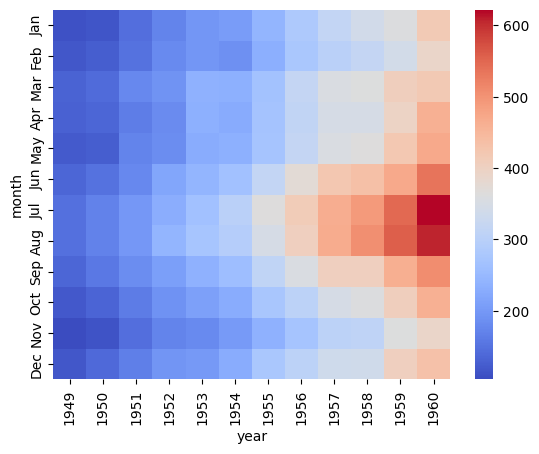

In [7]:
pv = f.pivot_table(values='passengers', index='month', columns='year')
sns.heatmap(pv, cmap='coolwarm')

<Axes: xlabel='year', ylabel='month'>

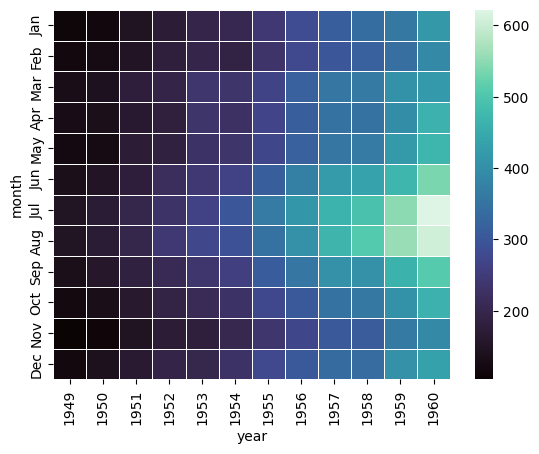

In [8]:
# Additional parameters for display
sns.heatmap(pv, cmap='mako', linecolor='white', linewidths=0.5)

<Axes: xlabel='year', ylabel='month'>

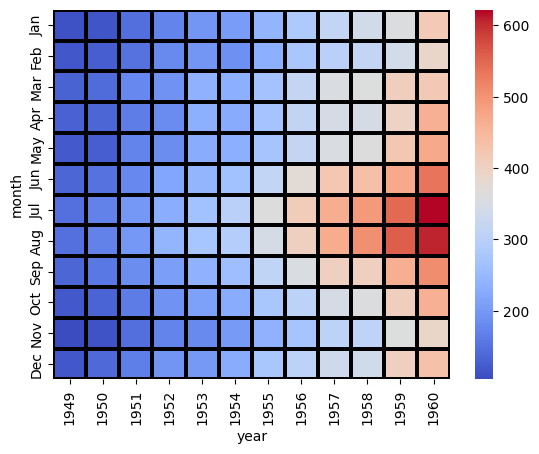

In [10]:
sns.heatmap(pv, cmap='coolwarm', linecolor='black', linewidths=1.5)

___
## clustermap
* Uses hierarchal clustering to produce a clustered version of the heatmap.

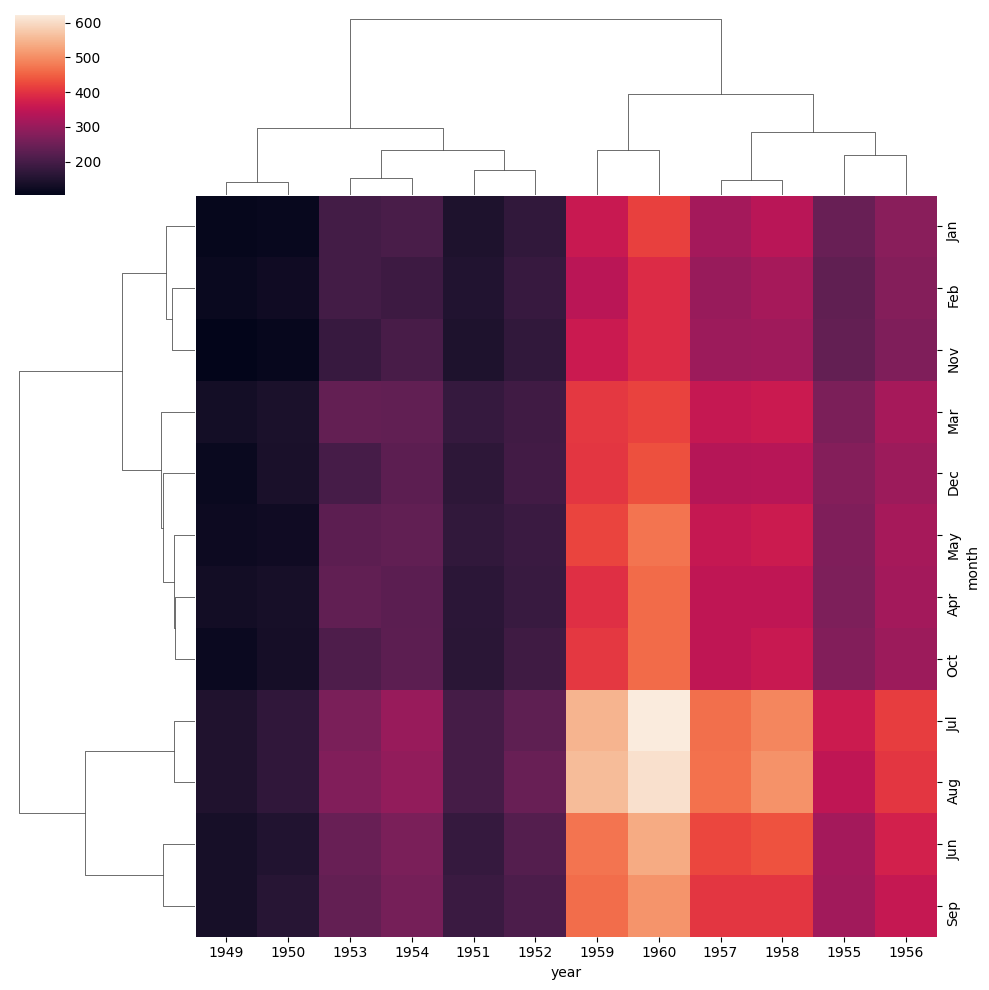

In [25]:
sns.clustermap(pv)

Note: Years and months are grouped by similarity in value (passenger count) instead of sequence. Thus, allows inferring of more information to a section of the dataframe.

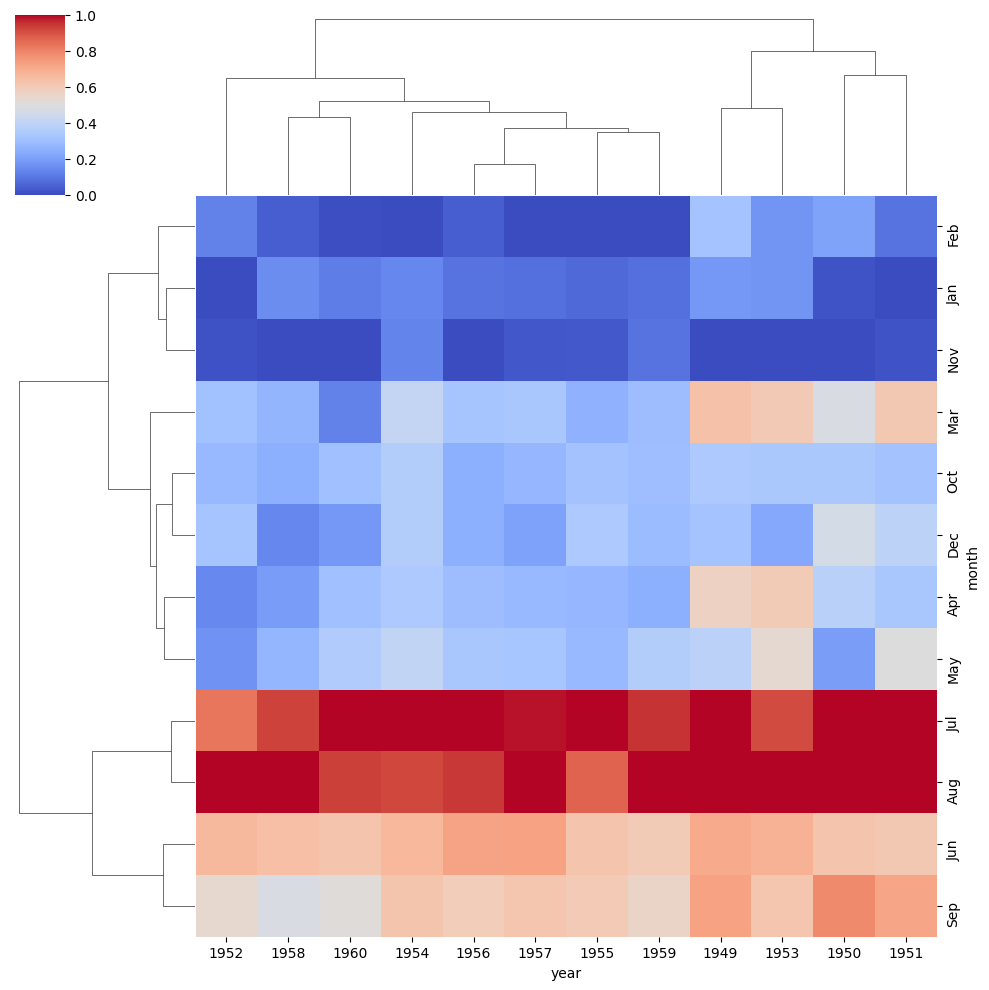

In [26]:
# Options to get more information such as normalization
sns.clustermap(pv, cmap='coolwarm', standard_scale=1)

___